# Model Validation & Bias/Variance Trade-Off

Basic recipe for applying a supervised machine learning model:

1. Choose a class of model
2. Choose model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data


Choosing the appropriate model and setting hyperparameters are the most important part of using these tools effectively. To ensure we made an informed choice, we must validate our model and hyperparameters are a good fit to our data.

## Thinking About Model Validation

After choosing a model and its hyperparameters, we can view its effectiveness by applying it to some training data and measuring its accuracy, but we will see that there are ways to further improve our validation and model accuracy.

#### Model validation the wrong way

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
# Choose model and hyperparameters
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# the label of an unknown point is equal to its nearest neighbor
model = KNeighborsClassifier(n_neighbors=1)

In [9]:
# train the model and use it to predict
model.fit(X, y)
y_model = model.predict(X)

In [10]:
# compute the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

100%? Is this truly measuring expected accuracy? The answer is **no**. There is a fundamental flaw: *the model trains and evaluates the model on the same data*. In addition, the KNN model is an instance-based estimator that stores the training data and predicts labels by comparing new data to stored points. 

A good example would be students taking a multiple-choice exam. Imagine the teacher gives the students a practice test with all of the answers already marked and allows the students to use the practice test during the actual exam. Then, when the students show up to the exam, the teacher hands out the exam and it is identical to the practice test. One would imagine every student should (hopefully) get 100% on the test, but the real question to ask is: do the students really understand the material they were tested on?

#### Model validation the right way: Holdout sets

Here we will use a *holdout set* to get a better sense of a model's performance. A *holdout set* is a portion of the data that is not provided during model training, and is then used to check the model performance after it has trained on the other portion of data.

In [14]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.5)

In [15]:
# fit the model on one set of data
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
# evaluate the model on the second set of data
y_predictions = model.predict(X_test)
accuracy_score(y_test, y_predictions)

0.90666666666666662

We see here that our K-Nearest Neighbors model is only 90% accurate on data it has not seen before. This is a much more reasonable outcome.

### Model validation via cross-validation
#### Two-Fold Cross-Validation

One issue with using a *holdout set* is that we have lost a portion of our data to use to train the model. This could be an issue, especially with a small dataset. A way to address this is by using *cross-validation* where we perform a sequence of model training and testing on different portions of the data.

![2foldcv](images/2foldCV.png)

In [17]:
y_test_model = model.fit(X_train, y_train).predict(X_test)
y_train_model = model.fit(X_test, y_test).predict(X_train)

In [18]:
accuracy_score(y_test, y_test_model), accuracy_score(y_train, y_train_model)

(0.90666666666666662, 0.95999999999999996)

Here we have two performance scores of 90.6% and 95.9% which we can combine by taking the average of the two (93.3%) to get a better measure of the global model performance. The method above is known as *two-fold cross-validation*, but we can improve upon this idea further by splitting our dataset into five groups instead of two. 

#### Five-Fold Cross-Validation

![5foldcv](images/5foldCV.png)

In [19]:
from sklearn.cross_validation import cross_val_score

In [20]:
model = KNeighborsClassifier(n_neighbors=1)
X = iris.data # feature columns
y = iris.target # target variable

In [21]:
cross_val_score(model, X, y, cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

Now we have an even better idea of the performance of our model. We could even take the idea to the extreme by only using 1 data point as validation and the rest of the dataset for training, cycling through point by point. The number of folds in this situation would be equal to the number of data points. This is known as *leave-one-out cross-validation*.

#### Leave-One-Out Cross-Validation

In [22]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [23]:
# take the mean of the scores get an estimate of error rate
scores.mean()

0.95999999999999996

## Selecting the Best Model

One big challenge is choosing the best model for your dataset. If our estimator is underperforming, how should we move forward? There are several answers:
 - Use a more complicated/flexible model
 - Use a less complicated/flexible model
 - Gather more training samples
 - Gather more data to add features to each sample
 
#### The bias-variance trade-off
 
Selecting the best model is often finding the sweet-spot in the trade-off between *bias and variance*.
 
![bias_variance](images/bias_variance.png)

The image above shows two regression fits to the same dataset. Neither appears to be a good fit, but they fail in different ways.

The model on the left tries to find a straight-line fit through the data, but the data is too complicated to be described with a straight line. This model is said to *underfit* the data. It does not have enough flexibility to suitably account for all the features in the data. This is a **high bias** model.

The model on the right tries to find a high-order polynomial fit through the data, almost touching every single point. Although this model does have flexibility to account for all the features in the data, it does not do a good job capturing the intrinsic properties of the dataset. This model is said to *overfit* the data. It has so much flexibility that the model ends up accounting for random errors as well as the underlying distribution. This model has **high variance**.

If we use these two models to predict the y-value for new data (red dots), we can calculate the ${R^2}$ score (or coefficient of determination) to measure how well a model performs relative to the average of the target values. An ${R^2}$ score of 1 would indicate the model's predictions is equal to the fit line, and an ${R^2}$ score of 0 means the model does no better than simply taking the mean of the data. A negative ${R^2}$ score is even worse. From the image above, we can conclude:
 - For the high-bias model, the performance of the model on the validation set is similar to the performance on the training set.
 - For the high-variance model, the performance of the model on the validation set is far worst than the performance on the training set.
 
If we were to tune the model complexity, we would expect the training score and validation score to behave like the following.

![validation curve](images/validation_curve.png)

#### Validation curves in Scikit-Learn

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [25]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [26]:
# now let's create some data to use to fit our model
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 -1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [27]:
X, y = make_data(40)

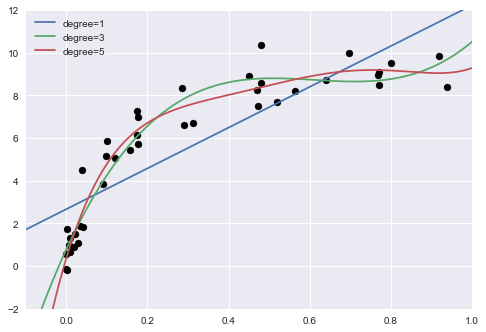

In [28]:
# visualize our data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

The knob controlling model complexity in this case is the degree of the polynomial. A good question to ask is: what degree of polynomial provides a suitable trade-off between bias (underfitting) and variance (overfitting)? We can get closer to the answer to this question by visualizing the validation curve for this data and model.

In [30]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

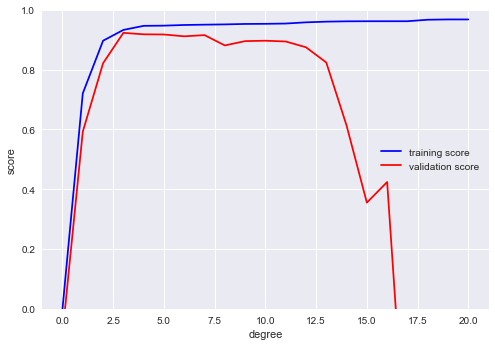

In [32]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

We can see the optimal trade-off between bias and variance is found for a third-order polynomial. Let's display this fit over the original data.

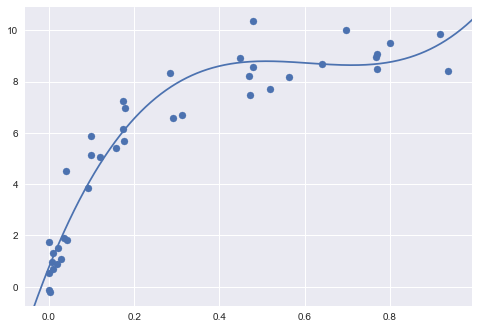

In [37]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## Learning Curves

One important aspect of model complexity is that the optimal model will generally depend on the size of training data. Let's break this down by generating a new dataset with 5x more points than the dataset above.

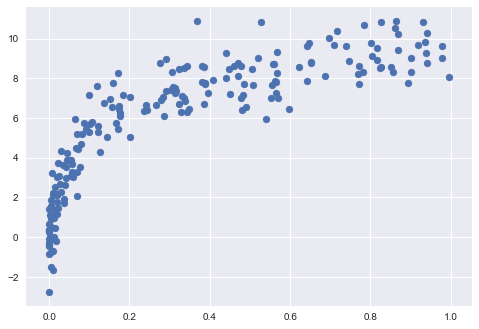

In [38]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

In [39]:
# Let's view the validation curve for this dataset
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                          'polynomialfeatures__degree', degree, cv=7)

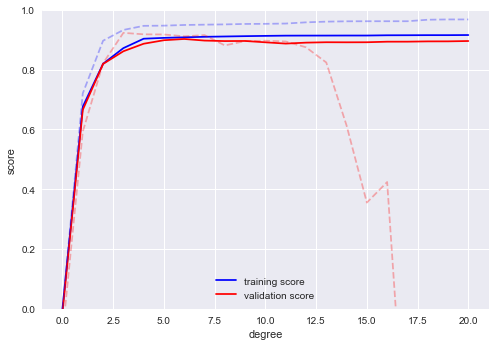

In [42]:
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='--')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='--')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

The solid lines show the new results and the dashed lines show the results of the previous smaller dataset. It is clear that the larger dataset can support a much more complicated model without seriously overfitting the model. 

The validation curve has two important inputs: the model complexity and the number of training points. It is often helpful to explore the model behavior as a function of the number of training points. A plot of the training/validation score with respect to the size of the training set is known as a *learning curve* which displays the following behaviors:
 - A model of defined complexity will *overfit* a small dataset. The training score should therefore be high and the validation score will be relatively low.
 - A model of defined complexity will *underfit* a large dataset. The training score will decrease, but the validation score will increase.
 - Unless it is pure luck, the validation score of a model will never be greater than the training score. Their lines will continue to converge, but will never cross.
 
A learning curve should look like the following:

![learning_curve](images/learningcurve.png)

It's interesting to note the convergence to a particular score as the number of training samples grows, however, once you have enough points for the model to converge, ***adding more training data will not help the model's performance***. The only way to increase model performance is to use another, more complex model.

#### Learning curves in Scikit-Learn
Let's compute a learning curve for our original dataset with a 2nd-order polynomial and a 9th-order polynomial.

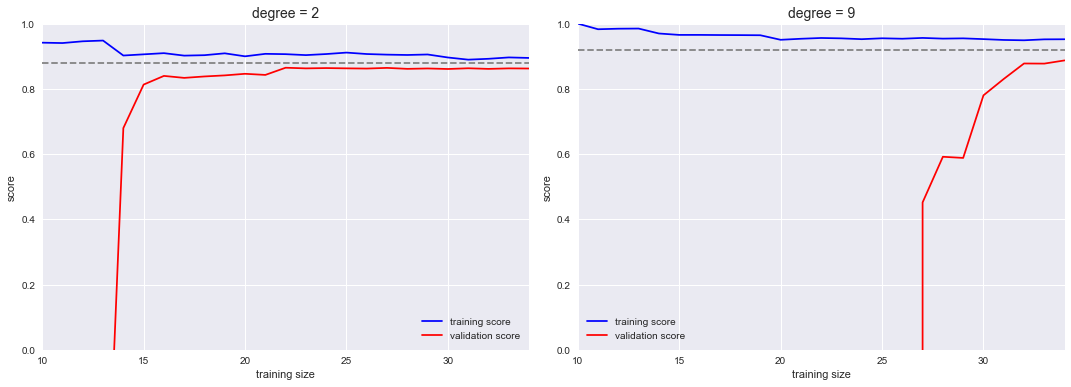

In [43]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7,
                                         train_sizes = np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', 
                 linestyle='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

The plot above is great because it gives us a visual depiction of how our model responds to increasing training data. As we can see on the 2nd degree model (left), when your learning curve has converged, adding more training data will not improve the fit. 

The only way to improve the model is by using a more complex model (most of the time). In the more complex, 9th degree model on the right, our convergence score (dashed line) is greater than the 2nd degree model. The downside of this is greater model variance, as indicated by the difference between the training and validation scores. By adding more data points, the model on the right will eventually converge.

## Validation in Practice: Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [47]:
# Fit to the data
grid.fit(X, y);

In [48]:
# Ask for best parameters
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

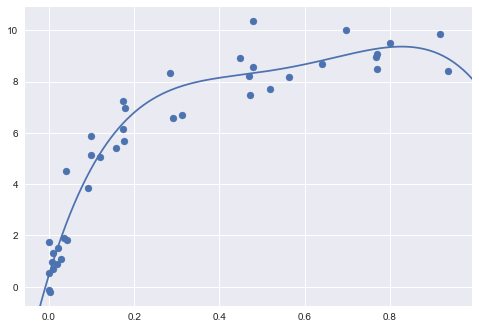

In [50]:
# let's check it out
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim);